# Calculating the Risk of Securities

In [1]:
import pandas as pd 
from pandas_datareader import data as wb
import yfinance 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
yfinance.pdr_override()

## Importing Securities Data 

In [9]:
amrt = wb.get_data_yahoo('AMRT.jk', start = '2015-01-01', end = '2023-04-01')['Adj Close']
bfin = wb.get_data_yahoo('BFIN.jk', start = '2015-01-01', end = '2023-04-01')['Adj Close']
admf = wb.get_data_yahoo('ADMF.jk', start = '2015-01-01', end = '2023-04-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Calculating Log Retrn of Adj Closing Price

In [17]:
amrt_log_return = np.log(amrt / amrt.shift(1))
bfin_log_return = np.log(bfin / bfin.shift(1))
admf_log_return = np.log(admf / admf.shift(1))

### AMRT

#### Daily Return

In [19]:
amrt_log_return.mean()

0.0008906954416571424

In [20]:
amrt_log_return.std()

0.02599994308438336

#### Annual Return 

In [22]:
amrt_log_return.mean() * 250

0.2226738604142856

In [23]:
amrt_log_return.std() * 250 ** 0.5

0.4110951959069742

### ADMF

#### Daily Return

In [41]:
admf_daily_return = admf_log_return.mean()
admf_daily_return

0.0004935776516072988

In [25]:
admf_log_return.std()

0.014894356587411794

#### Annual Return

In [26]:
admf_log_return.mean() * 250

0.1233944129018247

In [27]:
admf_log_return.std() * 250 ** 0.5

0.23550045549477028

### BFIN

#### Daily Return

In [29]:
bfin_log_return.mean()

0.0010348809855993022

In [30]:
bfin_log_return.std()

0.02777862919420809

#### Annual Return 

In [31]:
bfin_log_return.mean() * 250

0.25872024639982555

In [33]:
bfin_log_return.std() * 250 ** 0.5

0.43921869265472696

## Compiling Into a Single DataFrame 

### Daily

In [61]:
daily_return =  pd.DataFrame({
    'admf':admf_log_return.mean(),
    'amrt' :amrt_log_return.mean(),
    'bfin' : bfin_log_return.mean()}, index = [1])
daily_return

,admf,amrt,bfin
1,0.000494,0.000891,0.001035


In [62]:
daily_deviation = pd.DataFrame({
    'admf':admf_log_return.std(),
    'amrt' :amrt_log_return.std(),
    'bfin' : bfin_log_return.std()}, index = [1])
daily_deviation

,admf,amrt,bfin
1,0.014894,0.026,0.027779


### Annualy

In [64]:
annual_return =  pd.DataFrame({
    'admf':admf_log_return.mean() * 250,
    'amrt' :amrt_log_return.mean() * 250,
    'bfin' : bfin_log_return.mean() * 250}, index = [1])
annual_return

,admf,amrt,bfin
1,0.123394,0.222674,0.25872


In [65]:
annual_deviation = pd.DataFrame({
    'admf':admf_log_return.std() *250 **0.5,
    'amrt' :amrt_log_return.std() *250 **0.5,
    'bfin' : bfin_log_return.std() *250 **0.5}, index = [1])
annual_deviation

,admf,amrt,bfin
1,0.2355,0.411095,0.439219


## Compiling Risk & Return Simpler Way

In [108]:
tickers = ['BFIN.jk', 'BNGA.jk', 'ADMF.jk', 'MFIN.jk', 'APIC.jk', 'ARNA.jk']
financial_institution = pd.DataFrame()
for ticker in tickers : 
    financial_institution[ticker] = wb.get_data_yahoo(ticker, start = '2017-01-01', end = '2023-04-01')['Adj Close']
financial_institution.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BFIN.jk,BNGA.jk,ADMF.jk,MFIN.jk,APIC.jk,ARNA.jk
Date,,,,,,
2017-01-02,262.053680,654.197388,3709.806396,262.041595,428.0,376.830109
2017-01-03,262.053680,654.197388,3599.885986,262.041595,416.0,380.453461
2017-01-04,247.079239,654.197388,3517.446289,262.041595,410.0,297.116089
2017-01-05,258.310150,646.455383,3489.966064,263.765533,412.0,360.887299
2017-01-06,258.310150,650.326477,3462.485840,263.765533,412.0,362.336639


In [109]:
financial_institution.tail()

,BFIN.jk,BNGA.jk,ADMF.jk,MFIN.jk,APIC.jk,ARNA.jk
Date,,,,,,
2023-03-27,1290.0,1260.0,9333.068359,1695.0,1190.0,975.0
2023-03-28,1300.0,1255.0,9379.271484,1700.0,1185.0,1000.0
2023-03-29,1305.0,1260.0,9425.474609,1695.0,1195.0,995.0
2023-03-30,1305.0,1275.0,9448.577148,1690.0,1200.0,995.0
2023-03-31,1315.0,1270.0,9471.678711,1685.0,1225.0,1005.0


In [110]:
daily_return = financial_institution.pct_change()
daily_return.head()

,BFIN.jk,BNGA.jk,ADMF.jk,MFIN.jk,APIC.jk,ARNA.jk
Date,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.000000,0.000000,-0.029630,0.000000,-0.028037,0.009615
2017-01-04,-0.057143,0.000000,-0.022901,0.000000,-0.014423,-0.219047
2017-01-05,0.045455,-0.011834,-0.007813,0.006579,0.004878,0.214634
2017-01-06,0.000000,0.005988,-0.007874,0.000000,0.000000,0.004016


In [111]:
daily_return.dropna(inplace= True)

### Calculating Simple Statistic Through Describe

In [112]:
daily_return.describe().T.loc[:, ["mean", 'std']]

,mean,std
BFIN.jk,0.001455,0.029494
BNGA.jk,0.000636,0.020782
ADMF.jk,0.000677,0.012539
MFIN.jk,0.001456,0.023384
APIC.jk,0.000784,0.015111
ARNA.jk,0.000825,0.019998


In [113]:
summary  = daily_return.describe().T.loc[:, ["mean", 'std']]

### Annualizing Return and Risk Data

In [114]:
summary['mean'] = summary['mean'] * 250
summary['std'] = summary['std'] *250 ** 0.5

In [115]:
summary

,mean,std
BFIN.jk,0.363712,0.466341
BNGA.jk,0.158929,0.328591
ADMF.jk,0.169131,0.198255
MFIN.jk,0.363995,0.369739
APIC.jk,0.196118,0.238920
ARNA.jk,0.206155,0.316189


## Drawing a Plot For Summary Data

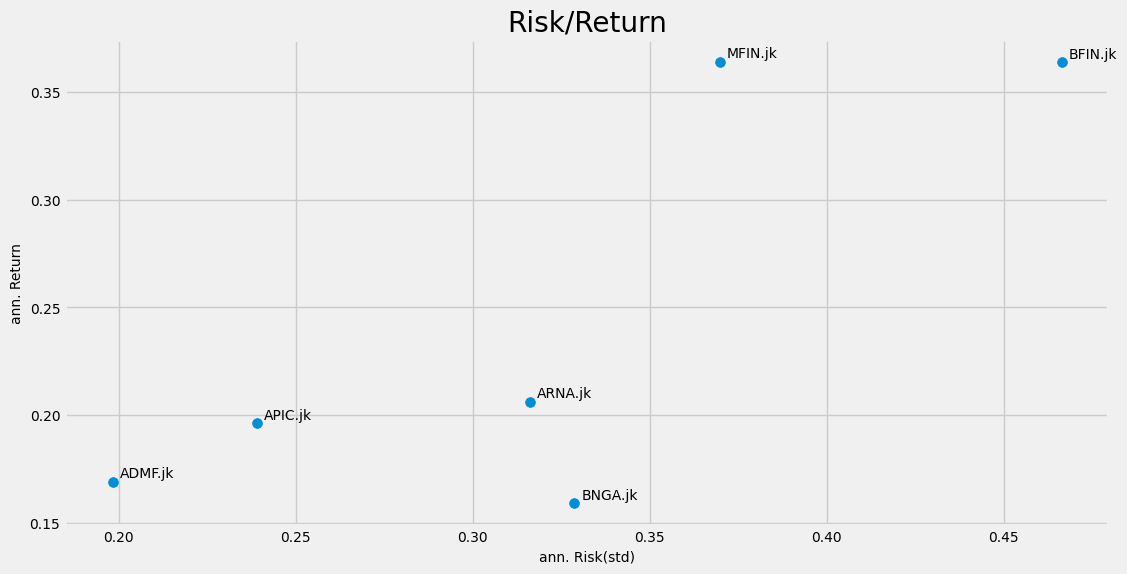

In [118]:
plt.style.use('fivethirtyeight')
summary.plot.scatter(x = 'std', y='mean', figsize = (12,6), s=50, fontsize = 10)
for i in summary.index : 
    plt.annotate(i,xy = (summary.loc[i, "std"] + 0.002, summary.loc[i, "mean"] + 0.002), size = 10)
plt.title("Risk/Return")
plt.xlabel("ann. Risk(std)", fontsize = 10)
plt.ylabel("ann. Return", fontsize = 10)
plt.show()

### Chart Summary 

For the comparison of several financial institute in indonesia we could see from the chart above that **BNGA** have the lowest performance compared to all, as it has the lowest annual return compared to the other companies in financial sector while having the 3rd highest standard deviation. while the rest of the companies seems to have a correlated risk and return ratio, the higher the risk the higher the return